# LU1 - Working with data - Example

In [1]:
# imports, feel free to ignore this for now 
import pandas as pd 
from matplotlib import pyplot as plt 
% matplotlib inline 

## 1 - Working with jupyter notebooks (this will be insultingly basic) 

Welcome! You are now within a [Jupyter notebook](http://jupyter.org/). We can do a few cool things: 

In [2]:
# basic math 
10 + 15

25

In [3]:
# defining variables 
some_number = 5
some_animal = 'cat'

In [4]:
# variables can be used later 
print('I have %0.0f tins of %s food' % (some_number, some_animal))

I have 5 tins of cat food


In [5]:
# defining functions 
def sum_all(a, b, c): 
    return a + b + c

In [6]:
sum_all(2, 3 , 4)

9

Writing in markdown: 

### some odd type of subtitle 

Look mom, I can write markdown! `def Mom==impressed`

> Do you see any Teletubbies in here? 

*yay formatting!* ... **be bold**

Loading images: 

![title](https://media.giphy.com/media/ljUXHv2x2BpjG/giphy.gif)

To learn more: [Lessons by datacamp](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)

## 2 - Loading data 

Great, we're ready to get to work! Let's start by loading our dataset, in our case some mushrooms! 

![title](https://mojohealth.com.au/assets/upload/data/mushrooms.jpg)

You already have some mushroom datasets in your `data` folder. 

We will load them using Pandas, using [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [7]:
# load the csv that is at path data/mushrooms.csv, into a Pandas DataFrame called data
data = pd.read_csv('data/mushrooms.csv')

# print the type 
print('Our dataset is now of the following type: %s' % type(data))

Our dataset is now of the following type: <class 'pandas.core.frame.DataFrame'>


This dataset will now be a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). 

It's ok (at first) to think of DataFrames as tables, a bit like spreadsheets. 

## 3 - Understanding data 

The first thing to do with any dataset is... to look at it! 

Let's use [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) to look at the first 5 lines of our DataFrame

In [8]:
data.head(5)

,gill-color,gill-size,spore-print-color,stalk-surface-above-ring,is_poisonous,height
0,k,n,k,s,1,4.6
1,k,b,n,s,0,4.8
2,n,b,n,s,0,5.6
3,n,n,k,s,1,4.8
4,k,b,n,s,0,4.5


How many rows and columns do we have? 

We can find out with the [.shape](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.shape.html) command

In [9]:
data.shape

(8124, 6)

What are the columns?

In [10]:
data.columns

Index(['gill-color', 'gill-size', 'spore-print-color',
       'stalk-surface-above-ring', 'is_poisonous', 'height'],
      dtype='object')

We can subset a column, by using brackets notation: 

In [11]:
# subset the column is_poisonous, and save it into a Pandas Series called poison 
poison = data['is_poisonous']


# print the type 
print('poison is a variable of the following type: %s' % type(poison))

poison is a variable of the following type: <class 'pandas.core.series.Series'>


You will notice that `poison` is now a Pandas Series (fancy name for "column"). Don't worry too much about this for now. 

We can use [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) to understand how many poisonous and non-poisonous mushrooms we have

In [12]:
# How many poisonous and non poisonous mushrooms do we have? 
data['is_poisonous'].value_counts()

0    4208
1    3916
Name: is_poisonous, dtype: int64

Let's see another column: 

In [13]:
# How many of each gill color do we have? 
data['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

Sometimes, we have continuous variables, such as `height`.  
If we do `value_counts` on `height` is will be pretty useless, as it has too many unique vaues. 

In these cases, using [a histogram](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html) is generally better: 

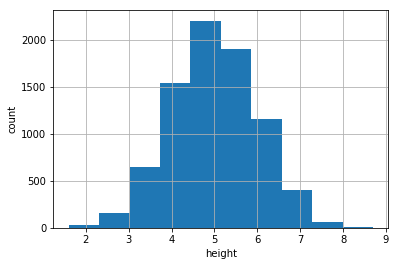

In [14]:
# draw a histogram for the heights column
data['height'].hist()
# the following is Matplotlib styling code
plt.xlabel('height')
plt.ylabel('count')
plt.show()

For a continuous variable, we can get a bunch of descriptive statistics: 

In [15]:
# Mean mushroom height: 
data['height'].mean()

4.996898079763664

In [16]:
# Minimum mushroom height: 
data['height'].min()

1.6

In [17]:
# max mushroom height: 
data['height'].max()

8.7

We can also look at a single mushroom, but subsetting the second line: 

In [18]:
data.iloc[2]  # get the second line 

gill-color                    n
gill-size                     b
spore-print-color             n
stalk-surface-above-ring      s
is_poisonous                  0
height                      5.6
Name: 2, dtype: object

## 5 - Groupby

Ok, now for something a bit trickier. 

We want to know what is the percentage of mushrooms that are poison, for each "color of spore-print" (whatever a spore-print is). 

So, we need to `groupby` the color of the spore, and then take the `mean` of `is_poisonous`

In [19]:
# mean poison by color = grouping by sprint color, take the mean of each group's is_poison
mean_poison_by_color = data.groupby('spore-print-color')['is_poisonous'].mean()

So what does this look like?

In [20]:
mean_poison_by_color

spore-print-color
b    0.000000
h    0.970588
k    0.119658
n    0.113821
o    0.000000
r    1.000000
u    0.000000
w    0.758794
y    0.000000
Name: is_poisonous, dtype: float64

As often happens, it is easier to just plot this, by adding a `.plot` at the end. In this case we 

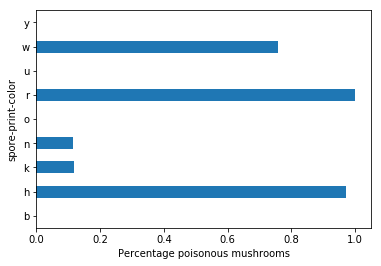

In [21]:
# plot the mean_poison_by_color, with a horizontal bar plot
mean_poison_by_color.plot(kind='barh')
# matplotlib styling (axis labels)
plt.xlabel('Percentage poisonous mushrooms')
plt.show()

Very interesting, we can tell that if the color is `r` (presumably red) the mushroom is always poisonous, but if is `y` (probably yellow) it is never poisonous. 

# Now go do this yourself! 

Feel free to play around with this notebook until you feel comfortable, then head over to the exercise of Learning Unit 1, where you will apply these concepts to a different dataset. 